# Análise exploratória do número de suicídios no Brasil por Estados (UF)

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
suicidiosDataSet = pd.read_csv('suicidios.csv', sep=';')

In [211]:
inicioPeriodo = min(suicidiosDataSet['período'])

fimPeriodo = max(suicidiosDataSet['período'])

## Descrição e Motivação do Problema

``` 
Este trabalho esta sendo desenvolvido durante uma pandemia, onde o contato com outras pessoas precisa ser evitado para que o vírus não se espalhe rapidamente. Nesse contexto podemos afirmar de acordo com dados da OMS que transtornos como a ansiedade, depressão entre outros estão aumentando consideravelmente.
Estes são fatores que afetam a capacidade do ser humano de se relacionar com o mundo a sua volta e com o próximo.
Além destes fatores o Brasil é reconhecidamente uns dos países com a população mais ansiosa no mundo.
levando em conta todos estes pontos, podemos inferir que o número de suicídios no Brasil tende a aumentar.
Desta forma, analisando os dados que temos até agora, podemos criar campanhas direcionadas aos estados mais críticos, para tentar evitar ou diminuir este número tão sombrio que cresce a cada dia.
```

## Descrição da base de dados

``` 
Para efetuar essa análise, foram utilizados os dados disponibilizados pelo IPEA (Instituto de Pesquisa Econômica Aplicada)
Os dados estão disponíveis através do link https://www.ipea.gov.br/atlasviolencia/filtros-series/16/suicidios
Neste caso utilizaremos os dados filtrados por UF
O dataset não é complexo, porém podemos encontrar informações importantes sobre o avanço dos casos de suicídios no Brasil.
```

#### O dataset é composto por 1053 linha e 4 colunas

In [212]:
suicidiosDataSet.shape

(1053, 4)

### O dataset possui as colunas, porém iremos renomear as colunas para um melhor entendimento

In [213]:
print(suicidiosDataSet.columns)

Index(['cod', 'nome', 'período', 'valor'], dtype='object')


``` 
A coluna cod mostra o código da unidade Federativa - Será renomeada para 'Código Estado'
A coluna nome mostra a sigla do estado referenciado - Será renomeada para 'Sigla Estado'
A coluna período mostra o ano em que os dados foram coletados - Será renomeada para 'Ano'
A coluna valor mostra o número total de suicídios em determinado ano - Será renomeada para 'Número de Suicídios'

Preparação da base de dados
Após fazer uma pequena análise com relação a integridade dos dados
```
### podemos verificar que não existem dados faltantes ou NAN em nenhuma coluna ou linha do dataset

In [214]:
dadosFaltantes = suicidiosDataSet.isnull().sum()
print(dadosFaltantes)

cod        0
nome       0
período    0
valor      0
dtype: int64


### porém, os nomes das colunas não são os ideais, portanto vamos renomear as colunas para facilitar o entendimento do dataset e seguir com a análise

In [215]:
suicidiosDataSet.rename(columns={'cod': 'Código Estado', 'nome' : 'Sigla Estado', 'período' : 'Ano', 'valor' : 'Número Suicídios'}, inplace=True)

### Após a renomeação temos a seguinte estrutura no dataset

In [228]:
suicidiosDataSet.head()

,Código Estado,Sigla Estado,Ano,Número Suicídios
0,11,RO,1979,21
1,12,AC,1979,2
2,13,AM,1979,19
3,14,RR,1979,2
4,15,PA,1979,55


In [217]:
suicidiosDataSet.describe()

,Código Estado,Ano,Número Suicídios
count,1053.000000,1053.000000,1053.000000
mean,29.111111,1998.000000,262.101614
std,12.787232,11.259977,371.270545
min,11.000000,1979.000000,0.000000
25%,17.000000,1988.000000,48.000000
50%,27.000000,1998.000000,116.000000
75%,41.000000,2008.000000,309.000000
max,53.000000,2017.000000,2306.000000


#### Com o dataset preparado, vamos através da análise exploratória responder as perguntas abaixo:
```
Qual o número total de suicídios ocorridos no Brasil durante o período analisado?
Qual o número de suicídios no Brasil por ano no período analisado?
Qual a média de número de suicídios em cada estado por ano?
Qual o número de número de suicídios por estado?
Qual o estado com o maior número de suicídios?
Qual o estado com o menor número de suicídios?
Os casos de suícidio, desde o início da análise, estão crescendo ou diminuindo em cada estado?
Existem estados em que o último ano analisado foi de queda no número de suicídios?
```

## Qual o número total de suicídios ocorridos no Brasil durante o período analisado?

In [218]:
totalSuicidiosBrasil_1979_2017 = suicidiosDataSet.sum()['Número Suicídios']
print("O total de suicídios ocorridos no Brasil durante 1979 a 2017 foi de", totalSuicidiosBrasil_1979_2017, "suicídios.")

O total de suicídios ocorridos no Brasil durante 1979 a 2017 foi de 275993 suicídios.


## Qual o número de suicídios no Brasil por ano no período analisado?

<AxesSubplot:title={'center':'Suicídios por Ano no Brasil'}, xlabel='Ano'>

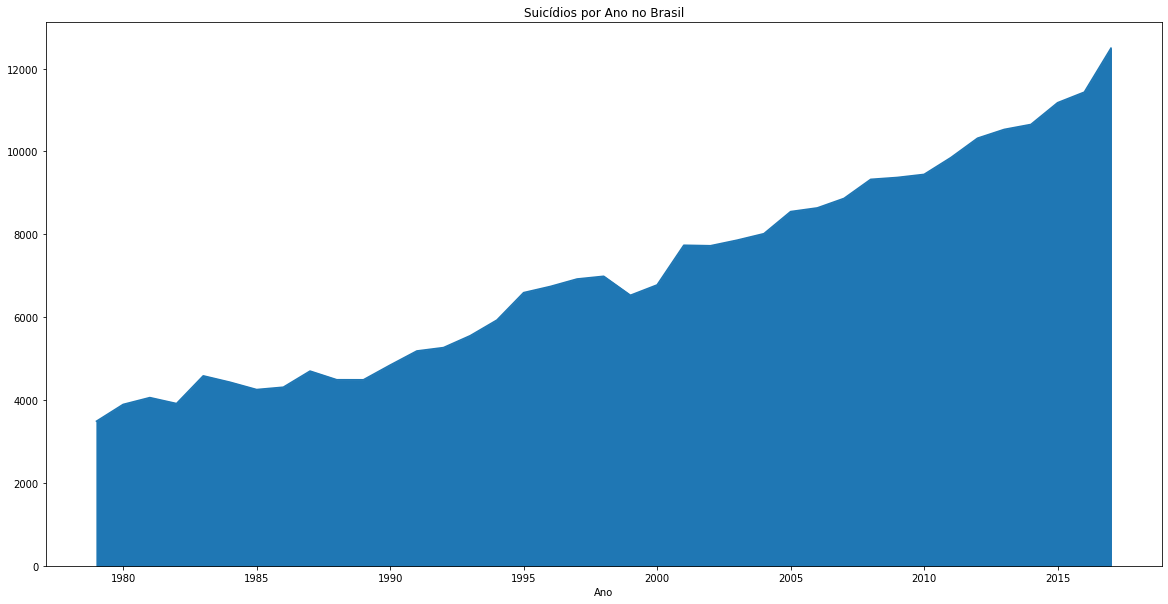

In [219]:
suicidiosPorAno = suicidiosDataSet.groupby(['Ano']).sum()['Número Suicídios']
suicidiosPorAno.plot(kind='area', figsize=(20,10), title='Suicídios por Ano no Brasil')

## Qual o número de número de suicídios por estado?

In [220]:
suicidiosPorEstado = suicidiosDataSet.groupby(['Sigla Estado']).sum().sort_values('Número Suicídios', ascending=False).drop(columns=['Código Estado', 'Ano'])
print(suicidiosPorEstado)

              Número Suicídios
Sigla Estado                  
SP                       63310
RS                       36643
MG                       30182
PR                       21666
SC                       15022
RJ                       13731
CE                       11903
GO                       10454
BA                        9591
PE                        9420
PA                        5523
MS                        5384
ES                        4481
PI                        4337
MT                        4159
MA                        4039
PB                        3871
RN                        3870
AM                        3594
DF                        3402
AL                        2867
SE                        2327
RO                        2184
TO                        1620
AC                         851
AP                         792
RR                         770


## Outra pergunta que podemos fazer é
## Qual o estado onde ocorre o maior número de suicídios?

In [221]:
print(suicidiosPorEstado.loc[suicidiosPorEstado['Número Suicídios'] == max(suicidiosPorEstado['Número Suicídios'])])

              Número Suicídios
Sigla Estado                  
SP                       63310


### Vendo o oposto para tomar como exemplo
### Qual o estado com o menor número de suicídios?

In [222]:
print(suicidiosPorEstado.loc[suicidiosPorEstado['Número Suicídios'] == min(suicidiosPorEstado['Número Suicídios'])])

              Número Suicídios
Sigla Estado                  
RR                         770


### Para fazer uma comparação entre o número total de todos os estados
### Podemos apresentar os números de uma forma gráfica

<AxesSubplot:title={'center':'Número de suicídios por Estados (UF)'}, xlabel='Sigla Estado'>

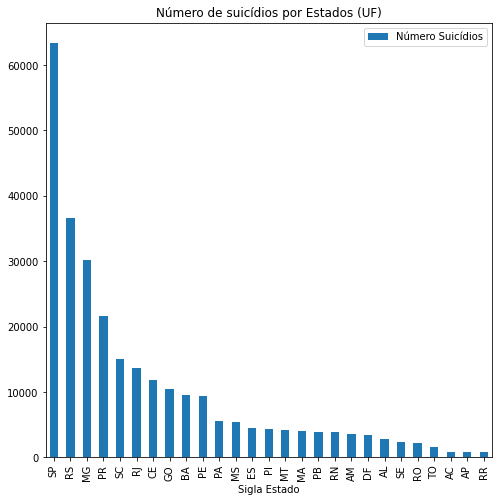

In [223]:
suicidiosPorEstado.plot(figsize=(8,8),title='Número de suicídios por Estados (UF)',kind='bar', stacked=True)

### De acordo com o contexto em que estamos inseridos, onde o país passa por um aumento no número de pessoas com ansiedade,
### Podemos então concluir então que o número de suicídios é crescente desde o início da amostragem?

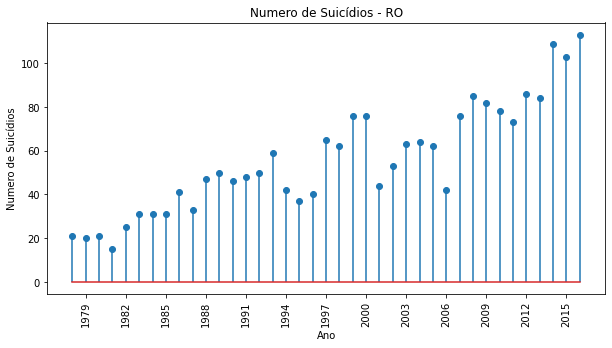

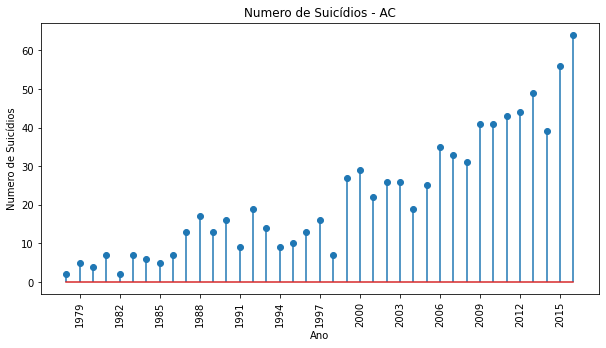

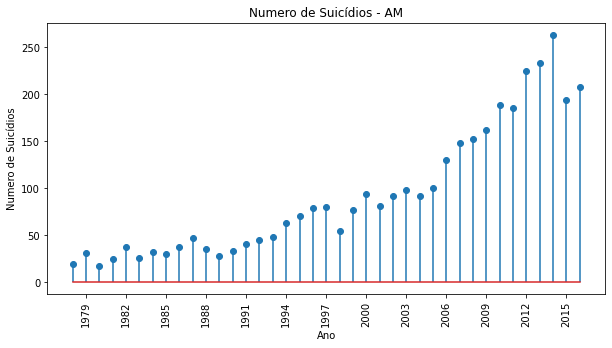

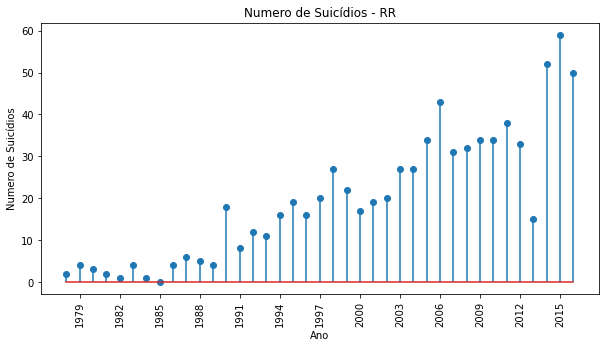

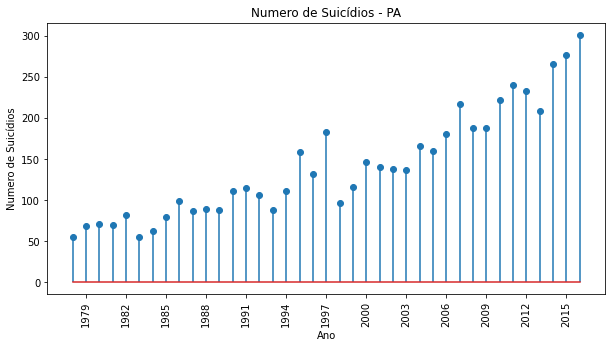

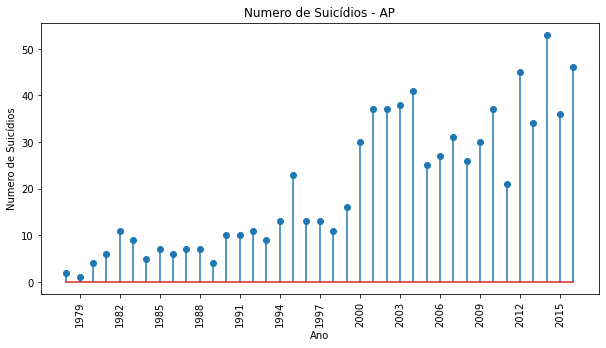

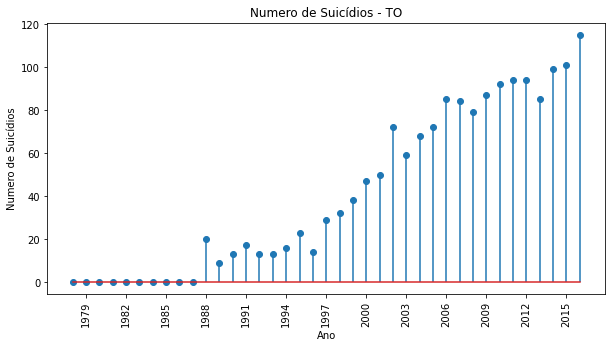

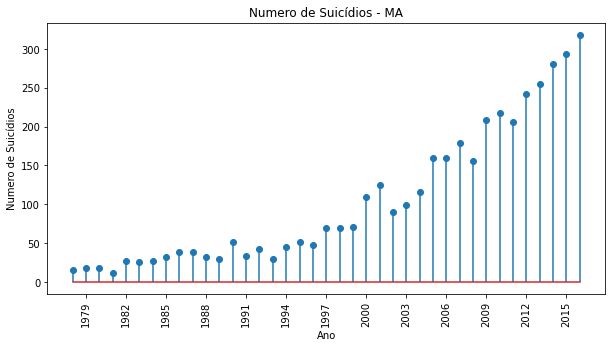

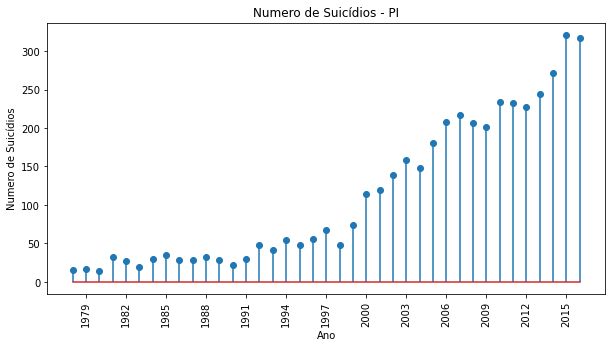

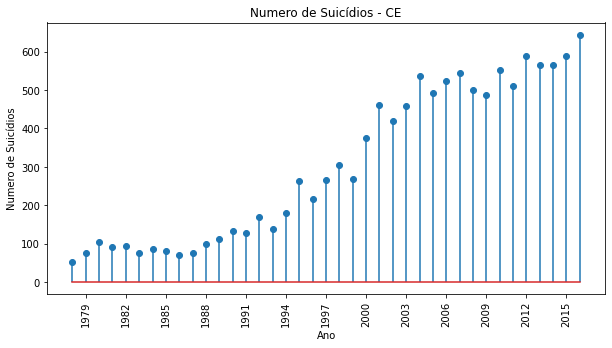

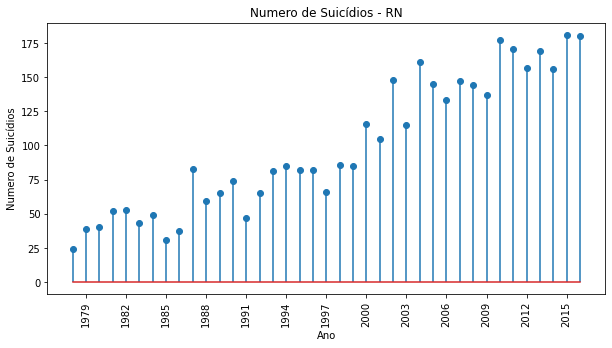

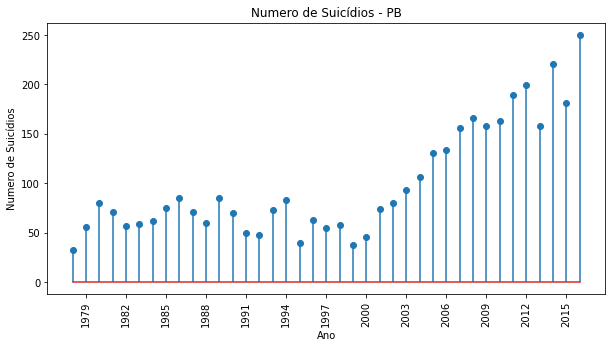

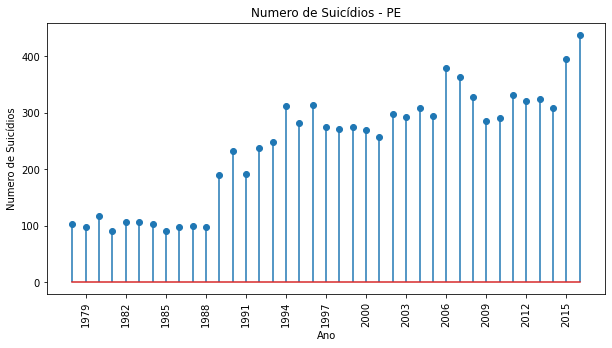

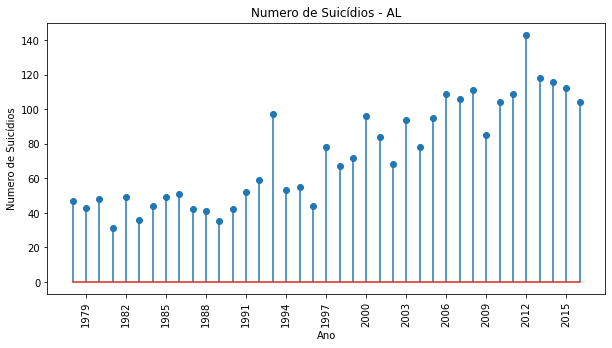

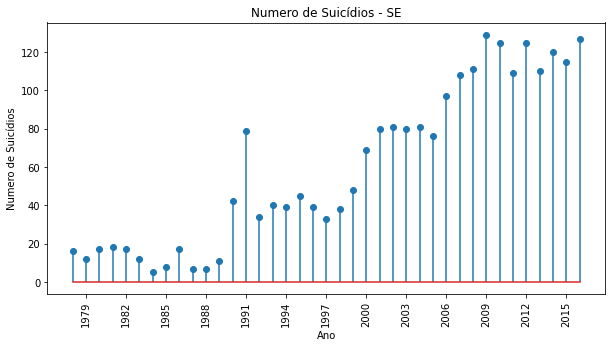

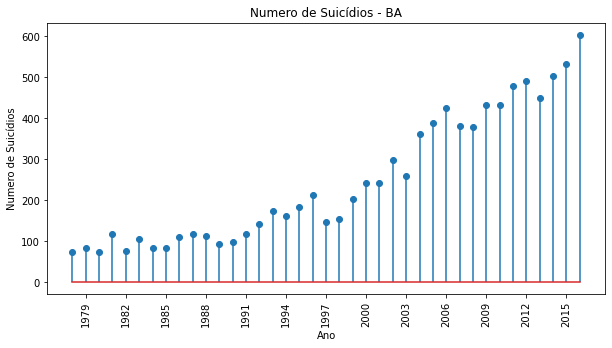

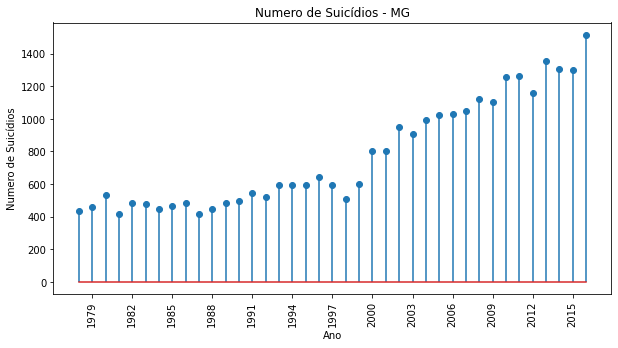

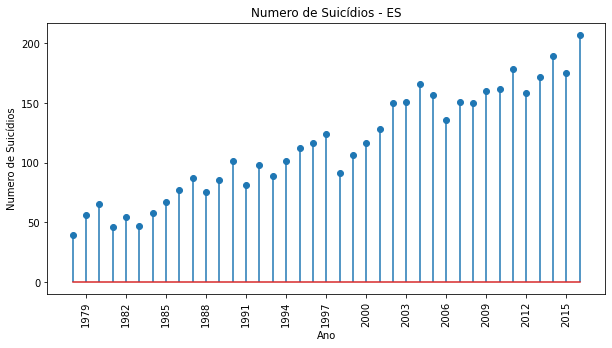

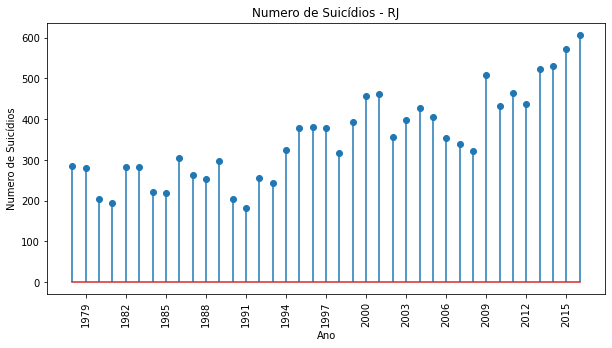

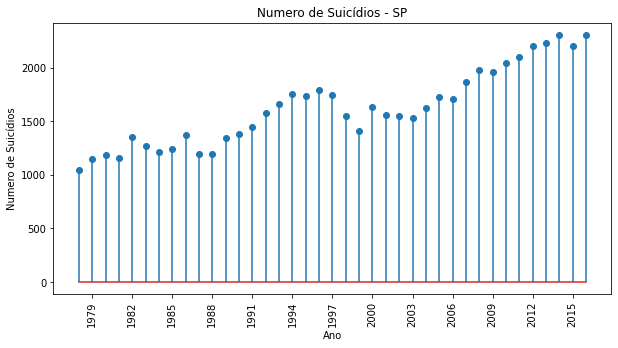

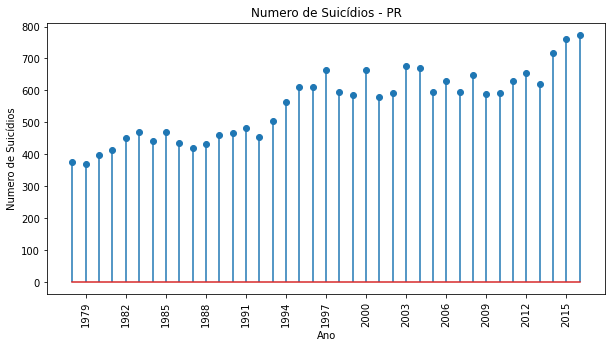

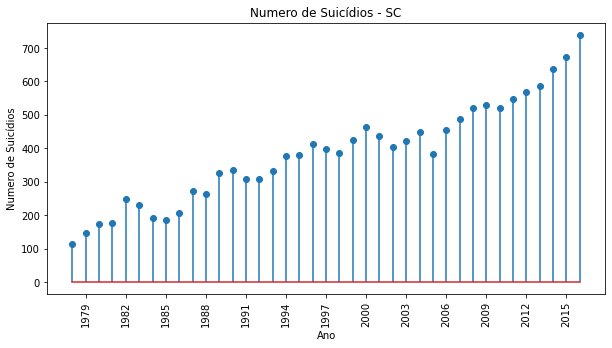

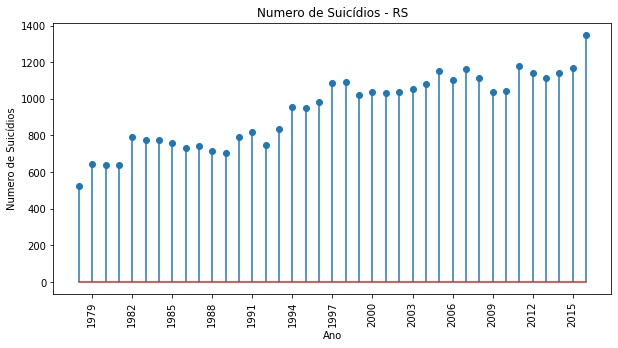

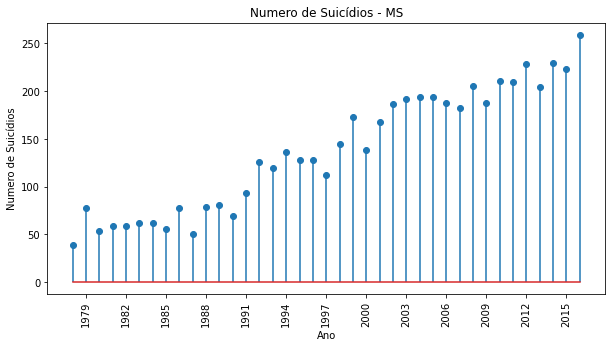

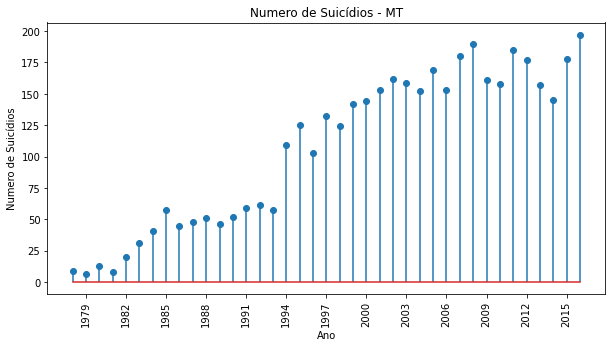

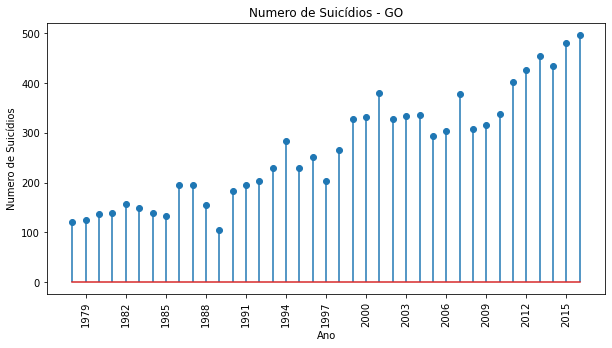

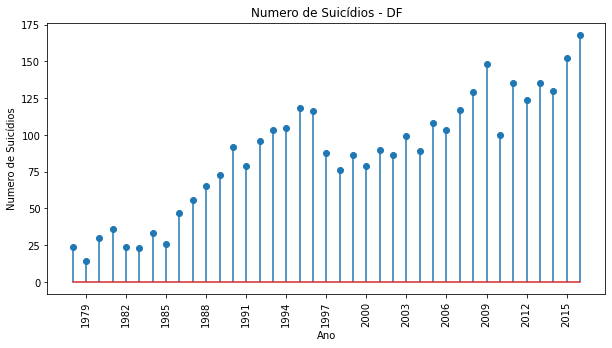

In [224]:
estados = suicidiosDataSet['Sigla Estado'].unique()
for i in estados:
    suicidiosPorEstado = suicidiosDataSet.loc[suicidiosDataSet['Sigla Estado'] == i]
    x = suicidiosPorEstado['Ano'] - 1
    y = suicidiosPorEstado['Número Suicídios']
    plt.figure(figsize=(10,5))
    plt.xlabel('Ano')
    plt.ylabel('Numero de Suicídios')
    plt.title('Numero de Suicídios - ' + str(i))
    plt.xticks(np.arange(1979, 2020, step=3), rotation=90)
    plt.stem(x, y, use_line_collection=True)
    plt.show()

### De acordo os gráficos apresentados de cada estado podemos concluir que a hipótese se confirma.
### Todos os estados tem um aumento no numero de suicídios durante o período analisado.

### Desta forma já que todos estão em uma crescente, uma hipótese plausível é que o ultimo ano do período analisado seja o ano com maior numero de casos

In [236]:
maximasEultimoAnoPorEstado = []
for i in estados:
    suicidiosPorEstado = suicidiosDataSet.loc[suicidiosDataSet['Sigla Estado'] == i]
    ultimo_ano = suicidiosPorEstado.loc[suicidiosPorEstado['Ano'] == fimPeriodo].drop(columns=['Código Estado', 'Sigla Estado','Ano'])
    maxima = max(suicidiosPorEstado['Número Suicídios'])
    maximasEultimoAnoPorEstado.append([i, maxima, ultimo_ano.to_numpy()[0], format((ultimo_ano.to_numpy()[0] / maxima) -1)])

maximasEultimoAnoPorEstadoDf = pd.DataFrame(maximasEultimoAnoPorEstado, columns=['Sigla Estado', 'Maxima', 'Suícidios Ultimo Ano', '%'])
print(maximasEultimoAnoPorEstadoDf.sort_values(['%']))

   Sigla Estado  Maxima Suícidios Ultimo Ano              %
10           RN     181                [180]  [-0.00552486]
8            PI     321                [317]  [-0.01246106]
14           SE     129                [127]  [-0.01550388]
5            AP      53                 [46]  [-0.13207547]
3            RR      59                 [50]  [-0.15254237]
2            AM     263                [207]  [-0.21292776]
13           AL     143                [104]  [-0.27272727]
24           MT     197                [197]           [0.]
23           MS     259                [259]           [0.]
22           RS    1349               [1349]           [0.]
21           SC     739                [739]           [0.]
20           PR     774                [774]           [0.]
19           SP    2306               [2306]           [0.]
18           RJ     607                [607]           [0.]
17           ES     207                [207]           [0.]
16           MG    1515               [1

### podemos ver que a hipótese não se confirma nesse caso, alguns estados tiveram uma redução no número de casos no último ano do período analisado
### Abaixo podemos mostrar graficamente os estados que tiveram diferença entre o ultimo ano da analise e sua maxima.

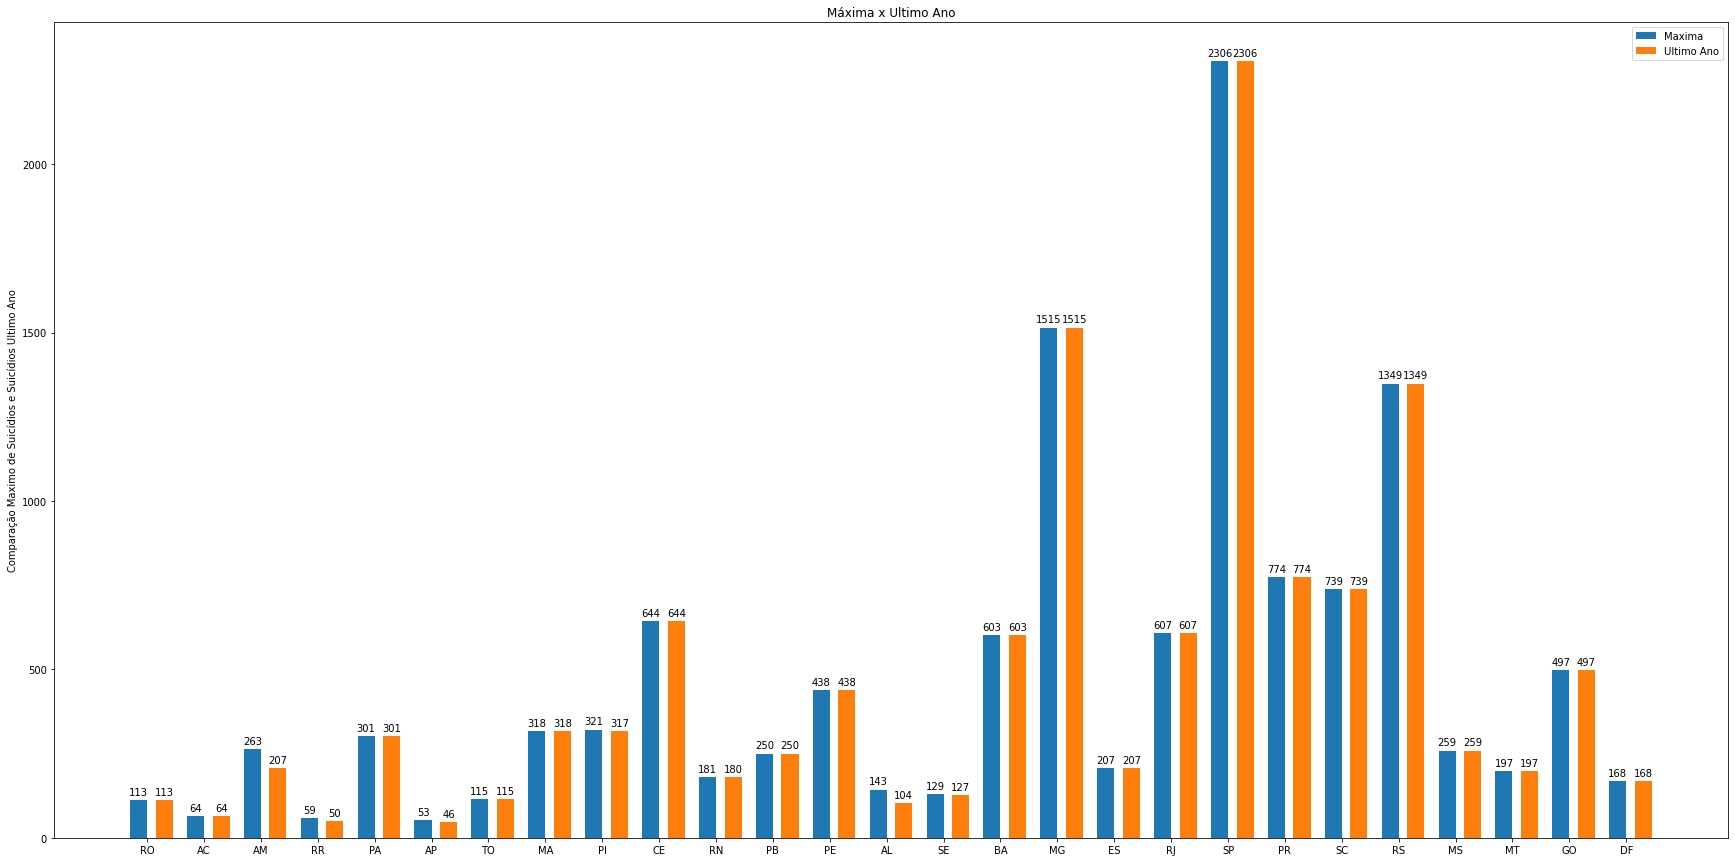

In [226]:
labels = maximasEultimoAnoPorEstadoDf['Sigla Estado'].to_list()
maximas = maximasEultimoAnoPorEstadoDf['Maxima (Suícidios)'].to_list()
ultimo_ano_value = []
for i in maximasEultimoAnoPorEstadoDf['Suícidios Ultimo Ano']:
    ultimo_ano_value.append(i[0])

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rect1 = ax.bar(x - width / 2, maximas, width, label='Maxima')
rect2 = ax.bar(x + width, ultimo_ano_value, width, label='Ultimo Ano')

ax.set_ylabel('Comparação Maximo de Suicídios e Suicídios Ultimo Ano')
ax.set_title('Máxima x Ultimo Ano')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)

fig.set_figheight(15)
fig.set_figwidth(30)

plt.show()
